# Investigação de dados

## DataSet: _Não comparecimento as consultas médicas_

Esta base de dados possui informações de 100.000 consultas médicas no Brasil e está focado na questão de buscar compreender se o paciente irá ou não comparecer a consulta. As características sobre os pacientes são descritas em cada linha.

<li>**ScheduledDay:** informa o dia em que o paciente marcou sua consulta.
<li>**Neighborhood:** indica a localização do hospital.
<li>**Scholarship:** indica se o paciente está ou não envolvido com o programa Bolsa Família.
Tenha cuidado ao interpretar a última coluna. **'No'** significa que o paciente compareceu a consulta previamente agendada. Por outro lado, **'Yes'** signifca que ele não compareceu.

## Table of Contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Perguntas

**1)** Quem mais falta as consultas homens ou mulheres?<br>
**2)** Qual a proporção de pacientes que não comparecem às consultas?<br>
**3)** Qual a distribuição da idade de pacientes que não comparecem às consultas?<br>
**4)** Há alguma relação entre doença e não comparecimento às consultas?<br>
**5)** Qual a cidade com maior número de não comparecimentos?<br>
**6)** Qual é o mês, dia da semana e dia do mês com maior número de não comparecimentos?<br>
**7)** Há alguma correlação entre a participação no programa social Bolsa Família e os comparecimentos?

## Carregar os dados:


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv');



# **1)** Quem mais falta as consultas homens ou mulheres?

In [4]:
df.groupby(["Gender", "No-show"]).size()



Gender  No-show
F       No         57246
        Yes        14594
M       No         30962
        Yes         7725
dtype: int64

Conclusão: Com um total de 14.594(mulheres) e 7725(homens) podemos afirmar que as mulheres faltam mais que os homens ás consultas médicas. 




# **2.** Qual a proporção de pacientes que não comparecem às consultas? 


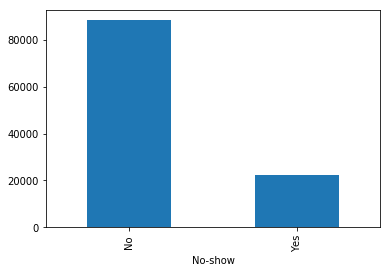

In [3]:
df.groupby('No-show')['AppointmentID'].nunique().plot(kind='bar')



# 3.Qual a distribuição da idade de pacientes que não comparecem às consultas?

In [9]:
distribuicao = df[df['No-show'] == 'Yes']



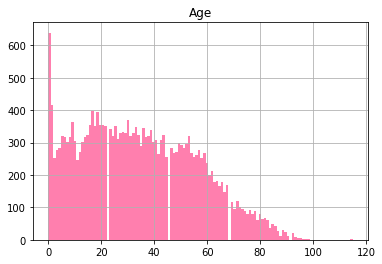

In [10]:
distribuicao[['No-show','Age']].hist(bins=120,alpha=0.5,color='#FF005E')
plt.savefig('nomeDaFigura.png')    


Conclusão: Podemos perceber, que o maior numero de faltas concentram-se em bebês, em seus primeiros meses de vida.

# **4)** Há alguma relação entre doença e não comparecimento às consultas?

In [11]:
hipertensos = df.loc[df['Hipertension'] == 1, ['No-show', 'Hipertension']]
hipertensosCont = hipertensos.loc[hipertensos['No-show'] == 'Yes', ['Hipertension']].count()

diabetes = df.loc[df['Diabetes'] == 1, ['No-show', 'Diabetes']]
diabetesCont = diabetes.loc[diabetes['No-show'] == 'Yes', ['Diabetes']].count()
alcoolismo = df.loc[df['Alcoholism'] == 1, ['No-show', 'Alcoholism']]
alcoolismoCont= alcoolismo.loc[alcoolismo['No-show'] == 'Yes', ['Alcoholism']].count()


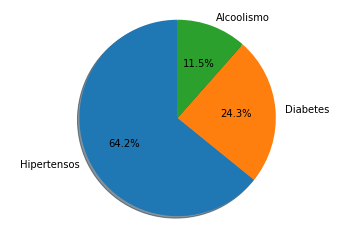

In [12]:
labels = ['Hipertensos', 'Diabetes', 'Alcoolismo']
sizes = [hipertensosCont,diabetesCont , alcoolismoCont]
fig1,ax1= plt.subplots()
ax1.pie(sizes,labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()
plt.savefig('pizza.png')    


   


Conclusão:Podemos perceber, que aparentemente os hipertensos são mais propensos a faltar ás consultas

# **5)** Qual a cidade com maior número de não comparecimentos?<br>


In [29]:
distribuicao['Neighbourhood'].unique()

#distribuicao['Neighbourhood'].values_counts(normalize=True)
cidade =pd.value_counts(distribuicao['Neighbourhood'].values.flatten())

cidade.idxmax('Neighbourhood')

'JARDIM CAMBURI'

Como podemos ver, o hospital com maior numero de não comparecimentos é o das proximidades do  JARDIM CAMBURI com 1465 não comparecimentos, o JARDIM CAMBURI, está localizado na cidade de Vitória-ES

# **6)** Qual é o mês, dia da semana e dia do mês com maior número de não comparecimentos?

In [81]:

distribuicao['AppointmentDay']=pd.to_datetime(distribuicao.AppointmentDay)





/home/vectro26/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Agora, agrupamos o numero de consultas por mês

In [125]:
df.groupby(distribuicao['AppointmentDay'].dt.month).size()


AppointmentDay
4.0      633
5.0    16804
6.0     4882
dtype: int64

Como podemos perceber, o mês 5(MAIO) é o que dispoẽ de maior quantidade de tuplas agrupadas, 
ou seja, ele é o mês com maior numero de faltas. Em seguida, agrupamos os dias do mês 5 
para podemos obter os dados de faltas por dia da semana

In [77]:
df.groupby(distribuicao['AppointmentDay'].dt.dayofweek).size()



AppointmentDay
0.0    4690
1.0    5152
2.0    5093
3.0    3338
4.0    4037
5.0       9
dtype: int64

Como podemos observar, o dia da semana  que ocorre maior numero de faltas, é a terça-feira
com 5123 faltas

In [78]:
pd.value_counts(dias.AppointmentDay.dt.day.values.flatten())


16    1049
9     1019
10     992
4      973
17     935
13     905
20     899
19     892
18     890
30     888
11     885
2      861
12     837
3      831
24     811
5      807
6      795
31     767
25     759
14       9
dtype: int64

Podemos observar,que no dia 16 é o dia que ocorre o maior numero de faltas, com 1049 faltas ocorridas no dia.

# **7)** Há alguma correlação entre a participação no programa social Bolsa Família e os comparecimentos?

In [144]:
df.groupby(["Scholarship", "No-show"]).size()



Scholarship  No-show
0            No         79925
             Yes        19741
1            No          8283
             Yes         2578
dtype: int64

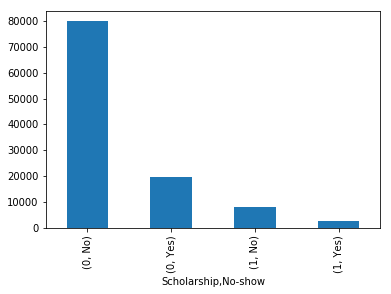

In [83]:
df.groupby(["Scholarship", "No-show"]).size().plot(kind='bar')


Conclusão: Os participantes do Bolsa Famíla correspondem a 10861, os mesmos em sua grande  maioria, no total de 8283 não faltam as consultas, o que correspondem a 76% das consultas realizadas com os participantes do programa. Ao analisar os dados, podemos perceber que é menos proprício participantes do bolsa família faltar aos atendimentos médicos.


# Conclusão geral 

Com base  no estudo realizado, podemos perceber que existe um Outlier na distribuição de idades dos pacientes, especificamente  nos primeiros de vida de um bebê, uma das hipóteses que pode ser levantadas é que existe essa ausência nas consultas, devido  o programa Estratégia Saúde Familiar(ESF), esse programa acompanha crianças e idosos, com isso não é necessário a ida até a unidade de saúde para realizar a consulta médica.